In [8]:
import pandas as pd

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.neural_network import MLPClassifier

In [2]:
df = pd.read_csv('large_data.csv')
df['TYPE'] = df['TYPE'].astype('category')

In [3]:
input_names = list(df.columns)
input_names.remove('TYPE')

all_inputs = df[input_names].values
all_labels = df['TYPE'].values

In [4]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

In [5]:
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()
scaler.fit(training_inputs)
training_inputs = scaler.transform(training_inputs)
testing_inputs = scaler.transform(testing_inputs)  

In [6]:
# Create the classifier
clf = MLPClassifier()

# Train the classifier on the training set
clf.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
clf.score(testing_inputs, testing_classes)

0.9107432067662408

Text(0.5, 1.0, 'Average score: 0.9231993925860481')

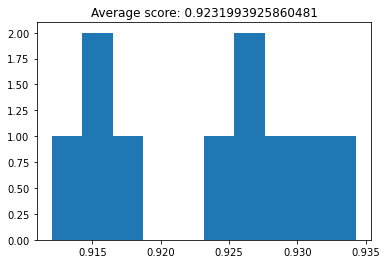

In [14]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(clf, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

parameter_grid = {
    'solver': ['adam'],
    'activation' : ['tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01], 
    'hidden_layer_sizes': [10, 50, 100],
    'max_iter' : [500]}


cross_validation = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(
    MLPClassifier(), 
    param_grid=parameter_grid, 
    cv=cross_validation,
    verbose=3)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best estimator: {}'.format(grid_search.best_estimator_))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=10, max_iter=500, solver=adam; total time=  13.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=10, max_iter=500, solver=adam; total time=  11.2s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=10, max_iter=500, solver=adam; total time=   9.2s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=10, max_iter=500, solver=adam; total time=   9.8s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=10, max_iter=500, solver=adam; total time=   8.3s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=50, max_iter=500, solver=adam; total time=   9.5s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=50, max_iter=500, solver=adam; total time=   9.6s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=50, max_iter=500, solver=adam; total time=  10.4s
[CV 4/5] END activation=tanh, alpha